# Grundlagen der Wahrscheinlichkeitsrechnung
25.2.2019, S. Mack

In [2]:
# display plots inside this notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

## Einleitung

Im voran gegangenem Notebook zum Bayes-Filter wurden Nachteile dieses Filters angesprochen: Der Bayes-Filter sieht die Welt *multimodal* und *diskret*. D.h. die Umwelt hat für ihn diskrete Zustände, für die er nach jeder Iteration, also nach jedem Zeitschritt, eine neue Auftrittswahrscheinlichkeit berechnet. Dabei kann es passieren, dass mehrere Zustände eine gleiche Wahrscheinlichkeit aufweisen.     
Beim Beispiel des Roboterfahrzeugs im Flur gab es nur zehn Zustände - die den zehn möglichen Positionen des Fahrzeugs vor einer der zehn Türen. Der Output des Bayes-Filters war eine Wahrscheinlichkeitsverteilung des Aufenthalts, die als Histogramm dargestellt wurde. Bei großen Messunsicherheiten konnte es vorkommen, dass dieses Histogramm zwei getrennte Häufungspunkte aufwies, das Fahrzeug also zu gleichen Wahrscheinlichkeiten an zwei verschiedenen Orten vermutet wurde.  

In der Technik liegen aber oft andere Anforderungen vor: Man möchte beispielsweise die xy-Position eines Roboterfahrzeugs in der Ebene bestimmen. Dabei ist sowohl die x- als auch die y-Koordinate ein kontinuierlicher Wert, der durch eine Fließkommazahl repräsentiert wird. Der gewünschte Filter soll dann die wahrscheinlichste xy-Postion zusammen mit entsprechenden Vertrauensintervallen ausgeben.  
**Beispiel:** "*Das Fahrzeug befindet sich an der Position x = 10,003 m, y = 2,223 m mit einer Unsicherheit (eine Standardabweichung) von jeweils $\pm$ 15 mm.*"

>Gewünscht ist also vielmehr ein *unimodaler* und *kontinuierlicher* Filteroutput. Dafür eignet sich die Gaußsche Wahrscheinlichkeitsrechnung viel besser als die Bayessche, zumal das Rechnen mit Gaußfunktionen auch effizienter ist.

## Kenngrößen der Wahrscheinlichkeitsrechnung

Im folgenden Notebook zum Kalman-Filter wird Vieles aus der Gaußschen Statistik verwendet. Daher werden nachfolgend die Begrifflichkeiten hierfür eingeführt und die grundlegenden Sachverhalte dazu erklärt.  
Ein Verständnis der Statistik scheitert leider oft an der verwendeten Notation, die von Lehrbuch zu Lehrbuch oder Internetquelle zu Internetquelle unterschiedlich ist. *In diesem Notebook wird die gleiche Notation wie auf den deutschen Wikipediaseiten verwendet.*

### Zufallsgrößen

Das prominenteste Beispiel für eine Zufallsgröße sind die Augen eines Würfels. Wenn man unendlich oft würfelt, dann wird  jede Augenzahl mit einer Häufigkeit von 1/6 auftreten. Hierzu sagt man, "die Wahrscheinlichkeit einer bestimmten Augenzahl beträgt 1/6".  
Die **Zufallsgröße** ist in diesem Beispiel die Augenzahl. Man nennt sie so, weil deren Wert vom Zufall abhängig ist.  
Die sogenannten **Funktionswerte** der Zufallsgröße "Augenzahl" lauten 1, 2, 3, 4, 5 und 6. Hier handelt es sich um diskrete Werte, die die Zufallsgröße annehmen kann.  

Andere Zufallsgrößen wie die Größe eines Menschen sind hingegen wertkontinuierlich. Die Funktionswerte bilden einen **Ergebnisraum**, der entweder wie bei den Würfelaugen abzählbare Elemente beinhaltet \[1,2,3,4,5,6\] oder wie bei einer x-Position ein Zahlenintervall ist wie z.B. \[0.000, 20.000\] m.  

Zufallsgrößen werden durch Großbuchstaben aus dem hinteren Teil des Alphabets bezeichnet, meistens mit $X$, $Y$ oder $Z$.  
Mit den entsprechenden Kleinbuchstaben also z.B. $x$ werden die Ergebnisse einer **Stichprobe** bezeichnet. $x=(1,1,2,6,6)$ bedeutet beispielsweise, es wurde je zweimal eine Eins und eine Sechs und einmal eine Zwei gewürfelt. Hier besteht die Stichprobe also aus den Messwerten der Zufallsgröße "Augenzahl". Wobei "Messen" in diesem Fall "Würfeln" bedeutet.

Die verschiedenen Funktionswerte von $X$ werden mit $x_i$ bezeichnet. Im Fall es Würfels gilt $x_i \in [1,2,3,4,5,6]$.

### Wahrscheinlichkeitsverteilung


Die **Wahrscheinlichkeitsverteilung** gibt an, mit welcher Wahrscheinlichkeit der jeweilige Funktionswert auftrittt. Bei diskreten Verteilungen wie die Würfelaugen, wird die Wahrscheinlichkeitsverteilung als Tabelle angegeben:

|Wert (Anzahl Augen)|Wahrscheinlichkeit|
|-----|-----------|
|1|1/6|
|2|1/6|
|3|1/6|
|4|1/6|
|5|1/6|
|6|1/6|

Bei kontinuierlichen Verteilungen wird die Wahrscheinlichkeit als xy-Grafik angegeben.  
Die Wahrscheinlichkeitsverteilung kann als Funktion angesehen werden. Sie wird duch den Buchstaben $P$ (engl. Probability) oder $f()$ repräsentiert. Für das Beispiel eine Würfelereignisses von vier Augen $x_4 = 4$ ergibt sich folgende Notation:

$$P(X{=}4) = f(4) = \frac{1}{6}$$

Die Gleichung oben drückt aus, dass die Wahrscheinlichkeit, eine Vier zu würfeln, den Wert 1/6 besitzt.  

Bei einem Münzenwurf besteht der Ergebnisraum aus den beiden Ereignissen Kopf und Zahl \[K, Z\]. Die Wahrscheinlichkeitsverteilung für diese beiden Zustände ist 50/50, also jeweils 1/2.  
Die mathematische Schreibweise dieses Sachverhalts lautet:  

$$\begin{gathered}P(X{=}K) = 0.5\\P(X{=}Z)=0.5\end{gathered}$$

Diskrete Zufallsgrößen besitzen diskrete Zufallsverteilungen, kontinuierliche Zufallsgrößen besitzen folglich kontinuierliche Zufallsverteilungen.  

Die Wahrscheinlichkeit für jedes Ereignis muss immer größer Null sein. Die Summe der Wahrscheinlichkeiten für alle Elemente des Ergebnisraums muss immer gleich Eins sein. Denn irgendeinen Wert muss die Zufallsgröße ja haben.

Es gilt also für diskrete Wahrscheinlichkeitsverteilungen mit N verschiedenen Funktionswerten

$$\sum\limits_{i=1}^N P(X{=}x_i)= 1$$

Für kontinuierliche Wahrscheinlichkeitsverteilungen mit einem kontinuierlichen Bereich von Funktionswerten wird die Summe durch ein Integral ersetzt:

$$\int_{-\infty}^\infty P(X{=}x) \,dx=\int_{-\infty}^\infty f(x) \,dx = 1$$

### Mittelwert und Median

Die bei einer Messung einer Zufallsgröße sich ergebenen Werte werden wie erwähnt als Stichprobe bezeichnet. Anders als beim Würfeln würde man bei der Zufallsgröße "Körpergröße" selbige tatsächlich mit einem Zollstock messen. Die Stichprobe hier bilden die Körpergrößen z.B. alle Studierenden einer Lehrveranstaltung.  

Möchte man die durchschnittliche Körpergröße aller Studierenden einer Lehrveranstalgung wissen, so berechnet man aus dieser Stichprobe den *Mittelwert*. Genauer gesagt den *arithmetrischen Mittelwert*, denn es gibt auch noch andere Mittelwertdefinitionen wie den "quadratischen" oder "geometrischen". Spricht man nur von "Mittelwert" dann ist jedoch immer der arithmetrische Mittelwert gemeint.  

Beispielsweise kann diese Stichprobe aus fünf Personen bestehen, deren gemessene Körpergrößen durch die Menge $X$ repräsentiert werden:   

$$X = \{1.8, 2.0, 1.7, 1.9, 1.6\}$$

Den *arithmetrischen* Mittelwert $\bar x$ berechnet sich wie folgt:

$$\bar x = \frac{1.8 + 2.0 + 1.7 + 1.9 + 1.6}{5} = 1.8$$

Allgemein berechnet sich der Mittelwert einer Stichprobe zu

$$ \bar x = \frac{1}{n}\sum^n_{i=1} x_i$$

Das Package ``NumPy`` enthält die Funktion ``numpy.mean()``, um den Mittelwert aus einer Stichprobe zu berechnen, die in Form einer Liste oder eines Arrays vorliegt.

In [3]:
x = [1.8, 2.0, 1.7, 1.9, 1.6]
print(np.mean(x))

1.8


Der *Modus* einer Stichprobe ist der Wert, welcher am häufigsten vorkommt. Wenn es nur einen Häufungspunkt in einer Verteilung gibt, dann nennt man diese *unimodal*. Gibt es mehrere Häufungspunkte, so spricht man von einer *multimodalen* Verteilung.  

**Beispiel:** Die Stichprobe {1, 2, 2, 2, 3, 4, 4, 4} hat die Modi 2 und 4. Beide Zahlen treten sogar gelich häufig auf. Eine andere Stichprobe {1, 1, 2, 2, 2, 1, 3, 3, 4} ist hingegen unimodal: Die Zahl 2 tritt am häufigsten auf.

Der *Median* $\bar x_{med}$ wird in politischen Diskussionen leider oft mit dem Mittelwert $\bar x$ verwechselt: Das Durchschnittseinkommen einer Bevölkerung kann z.B. sehr komfortabel sein. Trotzem kann die Mehrheit der Bevölkerung arm sein, wenn z.B. 5 % der Menschen über ein Einkommen wie Bill Gates verfügen.  
Aussagekräftiger ist hier der Median: Er bzeichnet die Mitte der Verteilung, also das Einkommen, für das es genau so viele Menschen gibt die darüber wie darunter liegen.  

Wenn eine Stichprobe aus einer geraden Anzahl von Werten besteht, dann berechnet man den Median als Mittelwert aus den in diesem Fall beiden mittleren Werten der Stichprobe.

Das Package ``NumPy`` enthält die Funktion ``numpy.median()`` zur Berechnung des Medians. Im Fall der sutdentischen Körpergrößen {1.8, 2.0, 1.7, 1.9, 1.6} ist der Median 1.8, denn diese Körpergröße liegt genau in der Mitte, falls man die einzelnen Werte der Reihe nach ordnet.

In [4]:
print(np.median(x))

1.8


### Erwartungswert einer Zufallsgröße

Der *Erwartungswert* darf nicht mit dem Mittelwert verwechselt werden. Dies passiert aber leider allzu häufig, zumal die Bezeichnung $\mu$ oft sowohl für den Mittelwert als auch für den Erwartungswert verwendet wird.  
Hier wird die Bezeichnung $E$ für die Funktion verwendet, die für eine Zufallsgröße $X$ den Erwartungswert berechnet. Das Ergebnis dieser Berechnung, also der Erwartungswert selbst wird mit $\mu$ bezeichnet.    

Der Mittelwert konvergiert gegen den Erwartungswert für eine unendlich große Stichprobe. Bei einer Messung einer verrauschten Messgröße ist dies anschaulich: Wenn man oft genug misst und die Messwerte mittelt, dann erhält man am Ende den "wahren Wert", also den "erwarteten" Wert für diese Messgröße.  

Der Erwartungswert lässt sich über die Wahrscheinlichkeitsverteilung berechnen. Sei $x_i$ das i-te Element der Zufallsgröße  $X$ und $p_i$ dessen Auftrittswahrscheinlichkeit (also das i-te Element von $P(X)$), dann gilt für den Erwartungswert $E$:

$$E[X] = \sum_{i=1}^n p_ix_i$$

Beim Würfel gilt $X = [1,2,3,4,5,6]$ und $P(X)=[1/6,1/6,1/6,1/6,1/6,1/6]$. Daraus folgt: $E[X] = 3,5$.

Bei einer kontinuierlichen Wahrscheinlichkeitsverteilung $f(x)$ gilt entsprechend

$$ E[X] = \int_{-\infty}^\infty x\, f(x) \,dx$$

> Nochmals zur Klarstellung: Der Begriff **Erwartungswert bezieht sich auf eine unendlich große Stichprobe**. Dann spricht man auch von einem **Erwartungswert einer Wahrscheinlichkeitsverteilung**.  
Von einer Stichprobe im eigentlichen Sinn, also eine **endlich große Stichprobe kann man nur einen Mittelwert berechnen**. Dieser Mittelwert weicht in der Regel vom Erwartungswert ab.

### Varianz einer Zufallsgröße

Der Mittelwert und der Median charakterisieren eine Zufallsverteilung natürlich nur annnähernd.  
Angenommen es gibt drei verschiedene Lehrveranstaltungen mit je fünf Studierenden, deren Körpergrößen gemessen wurden. Dadurch erhält man drei unterschiedliche Stichprobem $x_a$, $x_b$ und $x_c$, für die im nachfolgenden Code jeweils der Mittelwert und der Median berechnet werden.

In [5]:
x_a = [1.8, 2.0, 1.7, 1.9, 1.6]
x_b = [2.2, 1.5, 2.3, 1.7, 1.3]
x_c = [1.8, 1.8, 1.8, 1.8, 1.8]
print('Mittelwert: {}, Median: {}'.format(np.mean(x_a),np.median(x_a)))
print('Mittelwert: {}, Median: {}'.format(np.mean(x_b),np.median(x_b)))
print('Mittelwert: {}, Median: {}'.format(np.mean(x_c),np.median(x_c)))

Mittelwert: 1.8, Median: 1.8
Mittelwert: 1.8, Median: 1.7
Mittelwert: 1.8, Median: 1.8


Die Mittelwerte sind alle gleich und der Median unterscheidet sich nur gering.  
Schaut man auf die Messdaten, dann fällt aber die Stichprobe $x_b$ auf: Hier gibt es besonders große und besonders kleine Studierende. Bei den anderen Stichproben streuen die Körpergrößen nicht so stark.  
Die Streuung einer Zufallsgröße wird in der Statistik als *Varianz* $\mathit{Var}$ bezeichnet. Sie ist der Erwartungswert der quadratischen Abweichung vom Erwartungswert der Zufallsgröße: 
$$\mathit{Var}(X) = E[(X - \mu)^2]$$
Klingt kompliziert ist es aber nicht. Bei der Messung einer verrauschten Messgröße wäre dies die quadratische Abweichung vom wahren Wert. Die *qauadratische* und nicht die normale Abweichung muss man verwenden, da letztere meistens Null ist. Denn statistische Messabweichungen sind meistens symmetrisch um den wahren Wert.  

Bei einer endlich großen Stichprobe wie die Körpergrößen hier kann man auch eine "Varianz" berechnen, wobei hier statt des Erwartungswerts der Mittelwert verwendet wird:
$$\mathit{Var}(x) = \frac{1}{n}\sum_{i=1}^n (x_i - \bar x)^2$$
 
> Die Varianz einer Stichprobe und die Varianz einer Wahrscheinlichkeitsverteilung sind also zwei verschiedene Dinge. Nur falls die Stichprobe unendlich groß wird, haben beide Größen den selben Wert.

Der Anschaulichkeit halber wird nachfolgend die Varianz der Stichprobe $x_a$ explizit berechnet:

Der Mittelwert von $x_a$ beträgt 1.8 ($\bar x_a = 1.8$), also gilt

$$ 
\begin{aligned}
\mathit{Var}(x_a) &=\frac{(1.8-1.8)^2 + (2-1.8)^2 + (1.7-1.8)^2 + (1.9-1.8)^2 + (1.6-1.8)^2} {5} \\
&= \frac{0 + 0.04 + 0.01 + 0.01 + 0.04}{5} \\
\mathit{Var}(x_a) &= 0.02 \, m^2
\end{aligned}$$

Einfacher geht die Berechnung mit der ``NumPy``-Funktion ``numpy.var()``:

In [6]:
print('Varianz x_a: {:.3f} m²'.format(np.var(x_a)))
print('Varianz x_b: {:.3f} m²'.format(np.var(x_b)))
print('Varianz x_c: {:.3f} m²'.format(np.var(x_c)))

Varianz x_a: 0.020 m²
Varianz x_b: 0.152 m²
Varianz x_c: 0.000 m²


### Die Standardabweichung einer Zufallsgröße
Die Varianzen der Stichproben aus Körpergrößen haben die Einheit m², was nicht verwunderlich ist, denn darin steckt ja die *quadratische* Abweichung vom Erwartungswert. Will man daraus eine Größe für die Streubreite einer Verteilung berechnen, so muss noch die Wurzel aus der Varianz gezogen werden. Damit erhält man dann die sogenannte Standardabweichung $\sigma$: 

$$\sigma = \sqrt{\mathit{Var}(X)} = \sqrt{E[(X - \mu)^2]}$$

Bei einer endlich großen Stichprobe wie die Körpergrößen hier kann man anlog die Standardabweichung berechnen zu: 

$$\sigma = \sqrt{\mathit{Var}(X)}=\sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \bar x)^2}$$

Streng genommen darf man das aber nur für $n > 200$, d.h. wenn im Vergleich zu üblichen Messabweichungen von einigen Prozent "unendlich" viele Messwerte vorliegen. Bei dem Beispiel mit den Körpergrößen von fünf Studierenden ist das natürlich nicht der Fall, und es müsste die sogenannte "empirische Standardabweichung" $\sigma_{n-1}$ verwendet werden. Sie ist ein Schätzwert für die "echte" Standardabweichung. Dieser Umstand wird hier aber der Einfachheit halber ignoriert. Denn im Zusammenhang mit dem Kalman-Filter geht es nicht um die Standardabweichung von Stichproben sondern von Wahrscheinlichkeitsverteilungen.  

Für die Varianz wird übrigens oft die Bezeichnung $\sigma^2$ anstelle von $var(X)$ verwendet.

Das Package ``NumPy method`` stellt mit ``numpy.std()`` eine Funktion zur Berechnung der Standardabweichung zur Verfügung.

### Vertrauensintervall und Vertrauensniveau
Die Standardabweichung gibt wie die Varianz umgangssprachlich die "Streubreite" einer Verteilung an. Ist die Verteilung gaußförmig, dann kann über den Wert von $\sigma$ für ein *Vertrauensintervall* ein entsprechendes *Vertrauenniveau* berechnet werden.  
Beispielsweise entspricht einem Vertrauensintervall von $[\mu -\sigma, \mu +\sigma]$ einem Vertrauensnivau von 68 %.  
Die bedeutet Folgendes: Werden viele Messungen durchgeführt, dann liegen 68 % der Messwerte innerhalb dieses Vertrauensintervalls. Die restlichen 32 % liegen außerhalb.  
Beispielsweise liegen im Intervall $[\mu -2\sigma, \mu +2\sigma]$ 95 % und im Intervall $[\mu -3\sigma, \mu +3\sigma]$ 99,7 % aller Messwerte.  

In folgendem Plot ist dies visualisiert:  
Zuerst wird eine Stichprobe von 200 Körpergrößen erzeugt mit $\mu = 1,80\ m$ und $\sigma = 0,1414\ m$. Dies simuliert z.B. die Verteilung der Körpergrößen von 200 Studierenden in einer großen Grundlagenvorlesung.  
Diese Stichprobe wird im ersten Plot als Folge von Messwerten und im zweiten Plot als Histogramm dargestellt.

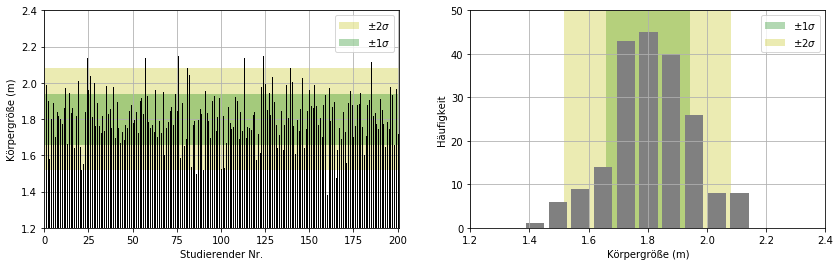

In [7]:
from numpy import random
random.seed(10)

m = 1.8 # expected Value
s = 0.141 # standard deviation

data = [m + s*random.randn() for i in range(200)] # generate sample of 200 students height values

fig, ax = plt.subplots(1, 2, figsize=(14, 4))

for i, height in enumerate(data):
    ax[0].plot([i+1, i+1], [0, height], color='k', lw=1)
ax[0].set_xlim(0,len(data)+1)
ax[0].set_ylim(1.2,2.4)
ax[0].fill_between((0, len(data)+1), m-2*s, m+2*s, facecolor='y', alpha=0.3, label = '$\pm 2 \sigma$')
ax[0].fill_between((0, len(data)+1), m-s, m+s, facecolor='g', alpha=0.3, label = '$\pm 1 \sigma$')
ax[0].grid()
ax[0].legend()
ax[0].set_xlabel('Studierender Nr.')
ax[0].set_ylabel('Körpergröße (m)')

ax[1].grid(zorder=0)
ax[1].hist(data, histtype='bar', color='grey', rwidth=0.8, zorder=1)
ax[1].set_ylim(0,50)
ax[1].set_xlim(1.2,2.4)
ax[1].set(xlabel='Körpergröße (m)', ylabel='Häufigkeit')
ax[1].fill_between((m-s, m+s), 0, 50, facecolor='g', alpha=0.3, label = '$\pm 1 \sigma$')
ax[1].fill_between((m-2*s, m+2*s), 0, 50, facecolor='y', alpha=0.3, label = '$\pm 2 \sigma$')
ax[1].legend()

Beide Plots zeigen die selbe Wahrscheinlichkeitsverteilung. Im linken Plot steht für jeden Studierenden eine vertikale Nadel, die dessen Körpergröße angibt. Im rechten Plot ist die Häufigkeitsverteilung der verschiedenen Körpergrößen dargestellt.  
Der Erwartungswert beträgt 1,80 m. Der grün hinterlegte Bereich entspricht einem Vertrauensintervall von $\pm 1 \sigma$, der gelb hinterlegte Bereich einem Vertrauensintervall von $\pm 2 \sigma$.  
Es ist gut sichtbar, dass im grünen Bereich ca. 68 % und im gelben Bereich ca. 95 % aller Werte liegen. Dies war auch so zu erwarten, denn die Stichprobe wurde ja mit der Funktion ``random.randn()`` als Gaußsche Normalverteilung generiert.  

In den voran gegangenen Abschnitten ging es immer ganz allgemein um Wahrscheinlichkeitsrechnung. Dieser Abschnitt hier bezieht sich erstmalig nur auf eine spzielle Wahrscheinlichkeitsverteilung - die Gaußsche Normalverteilung. Sie wird auch "Gaußverteilung" oder "Normalverteilung" gennant.

## Die Gaußsche Normalverteilung

Am Anfang dieses Notebooks wurde die Gaußverteilung schon als optimale Wahrscheinlichkeitsverteilung für einen unimodalen und kontinuierlichen Filter erwähnt.  
Die folgenden Abschnitte stellen die Gaußverteilung vor, und zeigen wie man mit ihr rechnerisch umgeht. Dabei wird deutlich, dass wie angekündigt das Rechnen mit Gaußverteilungen wesentlich einfacher ist als mit anderen beliebigen Wahrscheinlichkeitsverteilungen. Dies ist unter Anderem der Grund, wieso ein gewisser Hr. Kalman, genau die Gaußverteilung für seinen Filter verwendete.  
Die Gaußfunktion lautet:  

$$ f(x, \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\big [{-\frac{(x-\mu)^2}{2\sigma^2} }\big ]$$

Die Gaußfunktion kann mit dem ``SciPy``-Package generiert werden. Sie besitzt nur zwei Parameter: Der Erwartungswert $\mu$ und die Varianz $\sigma^2$. Nachfolgend wird ihr Verlauf für das Beispiel der studentischen Körpergrößen in einem Plot dargestellt.

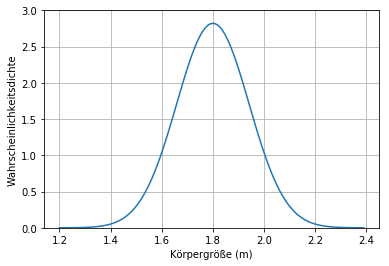

In [8]:
from scipy.stats import norm
x = np.arange(1.2,2.4,0.01)
mu = 1.8
sigma = 0.1414
pdf_gauss = norm.pdf(x,mu,sigma)

fig, ax = plt.subplots()
ax.plot(x,pdf_gauss)
ax.set_xlabel('Körpergröße (m)')
ax.set_ylabel('Wahrscheinlichkeitsdichte')
ax.set_ylim(0,3)
ax.grid()

Die Gaußverteilung ist eine Wahrscheinlichkeitsverteilung für eine Zufallsgröße mit *kontinuierlichen* Werten. Genau genommen ist sie eine *Wahrscheinlichkeitsdichtefunktion* (engl. "Probability Density Function" abgekürzt pdf).  
Auf der y-Achse ist daher auch nicht die Wahrscheinlichkeit sondern die Wahrscheinlichkeits*dichte* aufgetragen: Die Wahrscheinlichkeitsdichte für eine Körpergröße von genau 2,000000 m beträgt im Plot 1,0. Die Wahrscheinlichkeit, dass ein Studierender genau 2,000000 m groß ist, ist jedoch praktisch Null. Denn, dass jemand auf einen µm genau 2 m groß ist, kann als sehr unwahrscheinlich angesehen werden.  
Es macht auch sicher keinen Sinn die Körpergröße auf ein µm genau messen zu wollen. Eine Messgenauigkeit von $\pm$ 5 mm ist sicher wesentlich realitätsnäher. 

Daher sollte die Frage besser lauten:  
*Wie hoch ist die Wahrscheinlichkeit einer Körpergröße zwischen 1,995 m und 2,005 m?*  
Diese Frage lässt sich mit der Wahrscheinlichkeitsdichte rechnerisch beantworten. Die Wahrscheinlichkeit P beträgt  

$$ P = f(2\ m)\cdot(2,005\ m-1,995\ m)$$.

Hierbei ist $f(x)$ die Gaußsche Wahrscheinlichkeitsdichtefunktion - oder einfacher gesagt die Gaußfunktion - aus dem Plot oben. Für die Gaußfunktion gibt es im Package ``SciPy`` die Funktion ``norm.pdf()``:

In [9]:
P = norm.pdf(2,mu,sigma)*0.1 # probability density of height 2 m * interval width
print('Wahrscheinlichkeit Körpergröße im Intervall [1,995 m, 2,005 m]: {:0.3f}'.format(P))

Wahrscheinlichkeit Körpergröße im Intervall [1,995 m, 2,005 m]: 0.104


Möchte man die Wahrscheinlichkeit für ein größeres Intervall berechnen, so muss man die Gaußfunktion entsprechend integrieren. Beispielsweise beträgt die Wahrscheinlichkeit einer Körpergröße z kleiner gleich 1,60 m:  
$$P_{z< 1,6 m} = \int_{-\infty}^{1,6\ m} f(x) \,dx$$
Dieses Integral in allgemeiner Form als Funktion $F(x)$ nennt man "Verteilungsfunktion" im Gegensatz zur Gaußfunktion $f(x)$, die als "Dichtefunktion" bezeichnet wird. $F(x)$ gibt die Wahrscheinlichkeit an, dass die Zufallsgröße z kleiner x ist.
$$ P_{z<x}=F(x) = \int_{-\infty}^{x} f(u) \,du $$
Es lässt sich bekanntlich nicht analytisch berechnen. Aber auch dafür gibt es eine Funktion im Package ``SciPy`` die Funktion ``norm.pdf()``:

In [10]:
P = norm.cdf(1.6,mu,sigma) # Cumulative distribution function of height 1.6 m
print('Wahrscheinlichkeit Körpergröße kleiner gleich 1,6 m: {:0.3f}'.format(P))

Wahrscheinlichkeit Körpergröße kleiner gleich 1,6 m: 0.079


Mit dieser Funktion lässt sich auch die Wahrscheinlichkeit berechnen, dass sich eine Zufallsgröße z im Intervall $[-x,+x]$ befindet: $P_{-x<z<x}=F(x)-F(-x)$. Damit kann an dieser Stelle für die verschiedenen Vertrauensintervalle die zugehörigen Vertrauensniveaus berechnet werden, wie sie im voran gegangenen Abschnitt schon genannt wurden:

In [11]:
print('Wahrscheinlichkeit Erwartungswert +/- 1 Sigma: {:0.3f}'.format(norm.cdf(1,0,1)-norm.cdf(-1,0,1)))
print('Wahrscheinlichkeit Erwartungswert +/- 2 Sigma: {:0.3f}'.format(norm.cdf(2,0,1)-norm.cdf(-2,0,1)))
print('Wahrscheinlichkeit Erwartungswert +/- 3 Sigma: {:0.3f}'.format(norm.cdf(3,0,1)-norm.cdf(-3,0,1)))

Wahrscheinlichkeit Erwartungswert +/- 1 Sigma: 0.683
Wahrscheinlichkeit Erwartungswert +/- 2 Sigma: 0.954
Wahrscheinlichkeit Erwartungswert +/- 3 Sigma: 0.997


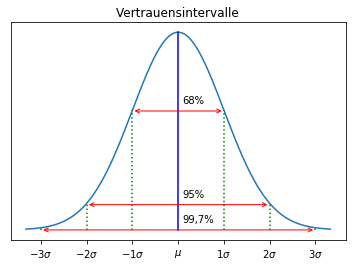

In [12]:
x = np.arange(-10,10,0.01)
mu = 0
sigma = 3
pdf_gauss = norm.pdf(x,mu,sigma)

fig, ax = plt.subplots()
ax.plot(x,pdf_gauss)

for x in [sigma,2*sigma,3*sigma]:
    y = norm.pdf(x,mu,sigma)
    ax.plot ([x,x], [0,y],'g',linestyle=':')
    ax.plot ([-x, -x], [0,y],'g',linestyle=':')

x = 0
y = norm.pdf(x,mu,sigma)
ax.plot ([0,0],[0,y],'b')

ax.annotate('68%', xy=(0.3, 0.085))
ax.annotate('', xy=(-sigma,0.08), xytext=(sigma,0.08),arrowprops=dict(arrowstyle="<->",ec="r",shrinkA=2, shrinkB=2))
ax.annotate('95%', xy=(0.3, 0.022))
ax.annotate('', xy=(-2*sigma,0.017), xytext=(2*sigma,0.017),arrowprops=dict(arrowstyle="<->",ec="r",shrinkA=2, shrinkB=2))
ax.annotate('99,7%', xy=(0.3, 0.005))
ax.annotate('', xy=(-3*sigma,0.00), xytext=(3*sigma,0.0),arrowprops=dict(arrowstyle="<->",ec="r",shrinkA=2, shrinkB=2))

ax.xaxis.set_ticks ([-3*sigma, -2*sigma, -sigma, 0, sigma, 2*sigma, 3*sigma])
ax.xaxis.set_ticklabels(['$-3\sigma$','$-2\sigma$', '$-1\sigma$','$\mu$','$1\sigma$','$2\sigma$','$3\sigma$'])
ax.yaxis.set_ticks([])
ax.set_title('Vertrauensintervalle')
ax.grid(None, 'both', lw=0)

**Plausicheck:**  
Die Verteilungsfunktion $F(x)$ der Körpergrößenverteilung für $x=\mu$ sollte den Wert 1/2 ergeben. Für $x=3\ m$ sollte sich nahezu der Wert 1 ergeben. Denn die Wahrscheinlichkeitsverteilung ist symmetrisch zum Erwartungswert, d.h. die Hälfte aller Studierenden ist kleiner gleich 1,8 m, und irgendeine Größe kleiner 3 m wird ein Studierender sicher haben, d.h. alle Studierenden sind kleiner 3,0 m.

In [13]:
print('Verteilungsfunktion x = µ: {}, x = 3 m: {}'.format(norm.cdf(1.8,mu,sigma),norm.cdf(3,mu,sigma)))

Verteilungsfunktion x = µ: 0.7257468822499265, x = 3 m: 0.8413447460685429


Die Gaussche Dichtefunktion und damit auch die Verteilungsfunktion sind also beide normiert. Dies sieht man auch eindrücklich, wenn man wie im folgenden Plot drei Gaußfunktionen mit selbem Erwartungswert aber unterschiedlicher Standardabweichung vergleicht. Je kleiner die Streubreite ist, desto höher ist die Wahrscheinlichkeitsdichte für den Erwartungswert, denn die Fläche unterhalb der Gausskurve ist immer gleich Eins.

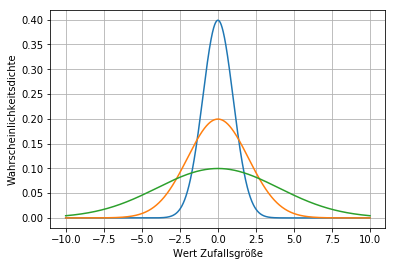

In [14]:
x = np.arange(-10,10,0.01)
mu = 0

pdf_gauss_1 = norm.pdf(x,mu,1)
pdf_gauss_2 = norm.pdf(x,mu,2)
pdf_gauss_3 = norm.pdf(x,mu,4)

fig, ax = plt.subplots()
ax.plot(x,pdf_gauss_1,x,pdf_gauss_2,x,pdf_gauss_3)
ax.set_xlabel('Wert Zufallsgröße')
ax.set_ylabel('Wahrscheinlichkeitsdichte')
ax.grid()

Dass eine Zufallsgröße $X$ einer Normalverteilung mit Erwartungswert $\mu$ und Standardabweichung $\sigma$ folgt, wird mathematisch allgemein in der Form $X \sim \mathcal N (\mu,\sigma)$ oder $X \sim \mathcal N (\mu,\sigma^2)$ ausgedrückt.  

In diesem Notebook wird ausschließlich die zweite Variante verwendet. Die zweite Zahl in der Klammer steht also für die Varianz. Der Ausdruck $\mathcal{N}(22,4)$ bedeutet beispielsweise eine Gaußverteilung mit Erwartungswert 22 und Standardabweichung 2 bzw. Varianz 4.

### Die Gaußverteilung und Messunsicherheiten

Wenn ein Messwert verrauscht ist, weil er durch viele unterschiedliche Einflüsse gestört wird, dann ist seine Wahrscheinlichkeitsverteilung gaußförmig. Dies ist mit anderen Worten der "Zentrale Grenzwertsatz der Statistik".   
Die Gaußfunktion ist also nicht nur praktisch, weil sie nur durch zwei Parameter spezifiziert wird, und weil das Rechnen mit ihr recht einfach ist. 
>Sensormesswerte zeigen eine Gaußverteilung, da die Messunsicherheit dieser Messwerte vielen unbekannten Einflüssen unterliegen.

In den Notebooks zum Bayes-Filter wurde daher angenommen, dass die Bewegungsabweichungen und Abstandsmesswerte gaußförmig streuen. Mit dadurch hatten die Histogramme der Bayes-Wahrscheinlichkeitsverteilungen auch oft gaußförmige Hüllkurven. Hr. Kalman hat also bestimmt nicht zufällig die Gaußverteilung als Grundlage für seinen Filter verwendet!  

Die Gaußverteilung hat aber auch Eigenschaften, die realtitätsfern sind: Wenn die Körpergrößenverteilung von Studierenden wirklich eine Gaußverteilung wäre, dann sollte es mit einer sehr sehr geringen aber nicht verschwindenden Wahrscheinlichkeit auch Studierende geben, die größer als 2,6 m sind. Doch selbst bei weltweit geschätzten 500 Millionen Studierenden wird wohl niemand mit dieser Körpergöße dabei sein.  
Ähnlich wie in den 1970er Jahren bei den Wahrscheinlichkeiten eines Atomkraftwerks-Supergaus, ignoriert man üblicherweise die Wahrscheinlichkeiten jenseits von ca. 6 $\sigma$. Gleiches gilt für typische 6$\sigma$-Qualitätsoffensiven in der Fertigung.

Am Beispiel der Sensormesswerte soll hier nochmals der Unterschied zwischen der Bayesschen und Gaußschen Sichtweise auf eine Statistik verdeutlicht werden:  
Angenommen die Körpergröße eines einzelnen Studierendern wird mit einem Sensor gemessen: 
* In der Bayes-Statistik gibt es nur N diskrete Körpergrößen, beispielsweise in 5 mm Schritten von 1,50 bis 2,50 m also N = 21. Eine Messung erzeugt in der Bayes-Statistik einen Array "Likelyhood", dessen einzelne Elemente die Wahrscheinlichkeit angeben, dass genau diese Körpergröße gemessen wurde. Die Information über die Messunsicherheit des Sensors steckt den N Elementen des Arrays "Likelyhood". 
* In der Gauß-Statistik ist die Körpergröße ein kontinuierlicher Wert. Die Sensormessung wird gedanklich unendlich oft wiederholt, wodurch die Sensorwerte am Ende eine Gaußverteilung um den wahren Wert herum beschreiben. Die Information über die Messunsicherheit des Sensors steckt dann nur in der Standardabweichung dieser Gaußverteilung.  

Letztlich sind beide Statistiksichtweisen gar nicht so unterschiedlich, wenn die Wahrscheinlichkeitsverteilung im Fall von Bayes auch unimodal ist. Bei einem einfachen Abstandssensor ist dies der Fall. Hier bietet sich die Gaußverteilung an, um die Mathematik eines Filters einfacher zu gestalten. Statt Vektormultiplikationen und Faltungen, kommt man in diesem Fall mit einfacheren Multiplikationen und Additionen von Gaußverteilungen aus.   
Geht es beispielsweise aber um einen Radarsensor, der gleichzeitig mehrere Echos von unterschiedlichen Reichweiten empfängt, dann ist die Verteilung multimodal, und man kann nicht mehr nur mit Gaußverteilungen rechnen.  

> Filter für Sensoren, die unimodale Messwertverteilungen liefern (d.h. es gibt nur einen wahren Wert, um den die Messwerte streuen), werden effizienter und mathematisch einfacher mit Gaußscher statt mit Bayesscher Wahrscheinlichkeitesrechnung beschrieben. Der Kalmanfilter geht genau diesen Weg.

## Rechnen mit Gaußverteilungen

Ein Bayes-Filter rechnet mit beliebigen (auch multimodalen) Wahrscheinlichkeitsverteilungen. Der Kalman-Filter verwendet nur Gaußsche Wahrscheinlichkeitsverteilungen, welche multipliziert und addiert werden, der Filteralgorithmus selbst ist aber identisch bei beiden Filtern.  

Die einfache Mathematik der Gaußverteilungen (neben dem Gauß-"konformen" Verhalten der Sensoren) sind es, was den Kalmanfilter auszeichnet. Denn die Summe oder das Produkt zweier Gaußverteilungen sind wieder Gaußverteilungen. Letztlich muss man beim Kalmanfilter also nur Erwartungswerte und Varianzen im Blick behalten! Dies macht den Kalmanfilter so attraktiv. Denn er kommt mit weitaus weniger Rechenzeit und Speicherplatz aus als ein entsprechender Bayes-Filter.

Das Produkt zweier nicht linearer Funktion wie z.B. $sin(x) \cdot sin(x)$ ergibt als Ergebnis eine andere Funktion. Bei Gaußverteilungen ist das anders:  

Das Produkt zweier voneinander unabhängigen Gaußverteilungen $\mathcal{N}(\mu_1,\sigma^2_1)$ und $\mathcal{N}(\mu_2,\sigma^2_2)$ergibt wieder eine Gaußverteilung $\mathcal{N}(\mu_3,\sigma^2_3)$.

$$\begin{aligned}\mu_3 &=\frac{\sigma_1^2\mu_2 + \sigma_2^2\mu_1}{\sigma_1^2+\sigma_2^2}\\
\sigma^2_3 &=\frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+\sigma_2^2} 
\end{aligned}$$

Die Summe zweier voneinander unabhängigen Gaußverteilungen ergibt auch wieder eine Gaußverteilung.

$$\begin{gathered}\mu_3 = \mu_1 + \mu_2 \\
\sigma^2_3 = \sigma^2_1 + \sigma^2_2
\end{gathered}$$

Diese beiden Rechenvorschriften sind übrigens die gleichen, wie die für eine Fehlerfortpflanzung statistischer Messunsicherheiten - auch hier wurde die Gaußfunktion als realitätsnahe Wahrscheinlichkeitsverteilung ausgewählt, weil man mit ihr "einfach rechnen kann".  
**Unabhängig** bedeutet in diesem Zusammenhang (genau wie bei der Fehlerrechnung), dass beide Gaußverteilungen **unabhängig voneinander rauschen**. Beim Kalman-Filter bedeutet dies: Die Wahrscheinlichkeitsverteilung des Zustandswerts ist unabhängig von der Wahrscheinlichkeitsverteilung des Messwerts.

## Zusammenfassung Wahrscheinlichkeitsrechnung mit Gaußverteilungen

Dieses Notebook ist als Auffrischung oder Crash-Kurs in Sachen Statistik gedacht. Es wurde bewusst auf theoretische Herleitungen und komplexere Mathematik verzichtet. Denn es geht nicht um das Fach Statistik an sich, sondern nur darum,  die Gaußsche Wahrscheinlichkeitsrechnung *als Werkzeug* für einen Kalman-Filter einzusetzen.  

Die folgenden Basisc **sollten unbedingt verstanden sein**, bevor es im nächsten Notebook dann endlich um den Kalman-Filter selbst geht:

* Gaußverteilungen repräsentieren unimodale und kontinuierliche Wahrscheinlichkeitsverteilungen.
* Gaußverteilungen werden komplett identifiziert über deren Erwartungswert ($\mu$) und ihre Varianz ($\sigma^2$).
* Der Erwartungswert $\mu$ ist der Mittelwert einer großen Stichprobe. Sie steht für den wahren Wert (Mess- bzw. Zustandswert)
* Die Varianz $\sigma^2$ repräsentiert die Unsicherheit einer Messung bzw. eines Zustandswertes.
* Die Standardabweichung ($\sigma$) ist nichts Anderes als die Wurzel der Varianz ($\sigma^2$)
* Das Rauschen von Sensoren und andere Prozesse in der Natur sind meist gaußförmig. Dies ist jedoch eine Näherung!